In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap as Basemap
from pathlib import Path

### Data folder

In [2]:
cwd = Path.cwd()
parent_dir = cwd.parent.parent

parent_dir

PosixPath('/Users/sebastiano/Desktop/Tweet2Geo/Tweet2Geo-main')

### Create directed weighted network

In [3]:
# network df
network_df = pd.read_csv(parent_dir / 'Data' / 'US' / 'source_target_norm_day no wa.csv')

# create directed graph
DG = nx.DiGraph()

for index, row in network_df.iterrows():
    if row['weight'] != 0:
        source = row['source']
        target = row['target']
        weight = row['weight']
        DG.add_edge(source, target, weight=weight)

edge_weights = [DG[u][v]['weight']/100 for u, v in DG.edges()]

### Compute degree

In [4]:
# DEGREE

# in and out degree
indegree_dict = dict(DG.in_degree(weight='weight'))
outdegree_dict = dict(DG.out_degree(weight='weight'))

for node, indegree in indegree_dict.items():
    print(f"Node {node}: Indegree (with weights) {indegree}")
for node, outdegree in outdegree_dict.items():
    print(f"Node {node}: Outdegree (with weights) {outdegree}")

# degree df
country_list = indegree_dict.keys()
in_list = []
out_list = []
tot_list = []

degree_df = pd.DataFrame(columns=['country', 'outdegree', 'indegree'], index=country_list)

for node, indegree in indegree_dict.items():
    degree_df.at[node, 'indegree'] = indegree
for node, outdegree in outdegree_dict.items():
    degree_df.at[node, 'outdegree'] = outdegree
degree_df['country'] = country_list

degree_df['total degree'] = degree_df['indegree'] + degree_df['outdegree']

degree_df.to_csv(parent_dir / 'Data' / 'US' / 'degree no wa.csv')

Node AL: Indegree (with weights) 183.81125150609793
Node AZ: Indegree (with weights) 184.6823948781648
Node AR: Indegree (with weights) 81.51412981482345
Node CA: Indegree (with weights) 563.007516461467
Node CO: Indegree (with weights) 214.67461668789375
Node DC: Indegree (with weights) 358.53772213207054
Node FL: Indegree (with weights) 782.1622990628478
Node GA: Indegree (with weights) 235.58205761749736
Node IL: Indegree (with weights) 634.1923748646416
Node IN: Indegree (with weights) 130.04926054426036
Node IA: Indegree (with weights) 144.36090165678647
Node KS: Indegree (with weights) 399.6059096723636
Node KY: Indegree (with weights) 179.2066365394592
Node LA: Indegree (with weights) 119.22219292000129
Node ME: Indegree (with weights) 38.33030837093985
Node MD: Indegree (with weights) 126.44023800284064
Node MA: Indegree (with weights) 160.9126257260561
Node MI: Indegree (with weights) 257.9828871849298
Node MN: Indegree (with weights) 133.7827321388323
Node MS: Indegree (with 

### Network measures

In [5]:
# NETWORK MEASURES

degree_centrality = nx.degree_centrality(DG)
closeness_centrality = nx.closeness_centrality(DG)
betweenness_centrality = nx.betweenness_centrality(DG)
clustering_coefficient = nx.average_clustering(DG)
density = nx.density(DG)

print(f"Degree centrality: {degree_centrality}")
print(f"Closeness centrality: {closeness_centrality}")
print(f"Betweenness centrality: {betweenness_centrality}")
print(f"Clustering coefficient: {clustering_coefficient}")
print(f"Network density: {density}") #todo normalization check

Degree centrality: {'AL': 1.851063829787234, 'AZ': 1.9574468085106382, 'AR': 1.8297872340425532, 'CA': 2.0, 'CO': 1.978723404255319, 'DC': 1.978723404255319, 'FL': 2.0, 'GA': 1.9361702127659575, 'IL': 2.0, 'IN': 1.9361702127659575, 'IA': 1.9361702127659575, 'KS': 1.8936170212765957, 'KY': 1.978723404255319, 'LA': 1.851063829787234, 'ME': 1.8085106382978724, 'MD': 1.9574468085106382, 'MA': 2.0, 'MI': 2.0, 'MN': 1.9574468085106382, 'MS': 1.7872340425531914, 'MO': 1.851063829787234, 'MT': 1.6595744680851063, 'NE': 1.851063829787234, 'NV': 1.9574468085106382, 'NH': 1.5319148936170213, 'NJ': 1.9361702127659575, 'NM': 1.7234042553191489, 'NY': 2.0, 'NC': 2.0, 'OH': 1.978723404255319, 'OK': 1.872340425531915, 'OR': 1.9574468085106382, 'PA': 2.0, 'RI': 1.4042553191489362, 'SC': 1.9148936170212765, 'SD': 1.4893617021276595, 'TN': 1.9148936170212765, 'TX': 2.0, 'UT': 1.9361702127659575, 'VT': 1.4468085106382977, 'VA': 1.9574468085106382, 'WV': 1.553191489361702, 'WI': 1.8936170212765957, 'WY': 1

### Map

In [6]:
# map

plt.figure(figsize = (10,10))

m = Basemap(width=6500000,height=8000000,
            resolution='l',projection='laea',\
            lat_0=39,lon_0=-97.)

<Figure size 1000x1000 with 0 Axes>

In [7]:
# set lat - lon

lat_lon_df = pd.read_csv(parent_dir / 'Data' / 'US' / 'lat_lon_US no wa.csv')

mx, my = m(lat_lon_df['lon'].values, lat_lon_df['lat'].values)

lon_mer = []
lat_mer = []

pos = {}

for count, elem in enumerate (lat_lon_df['ISO 2']):

 pos[elem] = (mx[count], my[count])

In [8]:
# set degree df

degree_df = pd.read_csv(parent_dir / 'Data' / 'US' / 'degree no wa.csv')

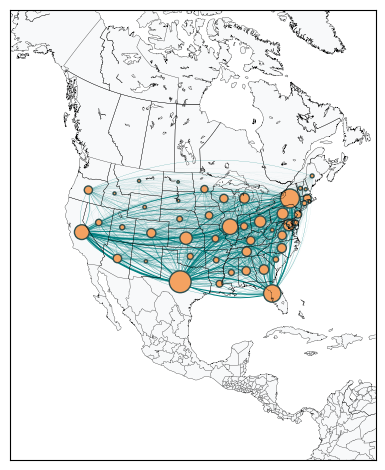

In [9]:
# in-strenght map

m.fillcontinents(color='#f8f9fa')

nx.draw_networkx_nodes(G = DG, pos = pos, node_color = '#f4a261', alpha = 1, node_size = degree_df['indegree']/5, edgecolors='darkslategray')

nx.draw_networkx_edges(G = DG, pos = pos, edge_color='teal', alpha=1, width=np.array(edge_weights).astype(float), arrowstyle='-', connectionstyle = 'arc3,rad=0.2', min_source_margin=0, min_target_margin=0, node_size = degree_df['indegree']/5)

m.drawcountries(linewidth = 0.2)

m.drawstates(linewidth = 0.2)

m.drawcoastlines(linewidth=0.2)

plt.tight_layout()

plt.savefig(parent_dir / 'Data analysis' / 'Network measures' / 'in_strenght_US.pdf')

plt.show()

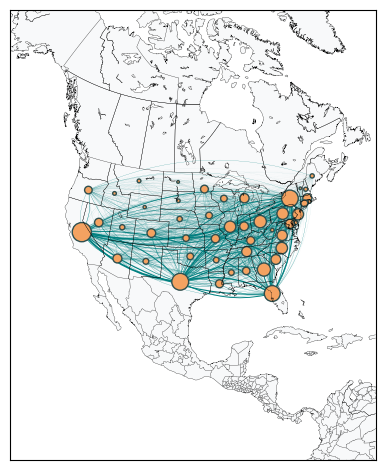

In [10]:
# out-strenght map

m.fillcontinents(color='#f8f9fa')

nx.draw_networkx_nodes(G = DG, pos = pos, node_color = '#f4a261', alpha = 1, node_size = degree_df['outdegree']/5, edgecolors='darkslategray')

nx.draw_networkx_edges(G = DG, pos = pos, edge_color='teal', alpha=1, width=np.array(edge_weights).astype(float), arrowstyle='-', connectionstyle = 'arc3,rad=0.2', min_source_margin=0, min_target_margin=0, node_size = degree_df['outdegree']/5)

m.drawcountries(linewidth = 0.2)

m.drawstates(linewidth = 0.2)

m.drawcoastlines(linewidth=0.2)

plt.tight_layout()

plt.savefig(parent_dir / 'Data analysis' / 'Network measures' / 'out_strength_US.pdf')

plt.show()

# network visualization with arrows

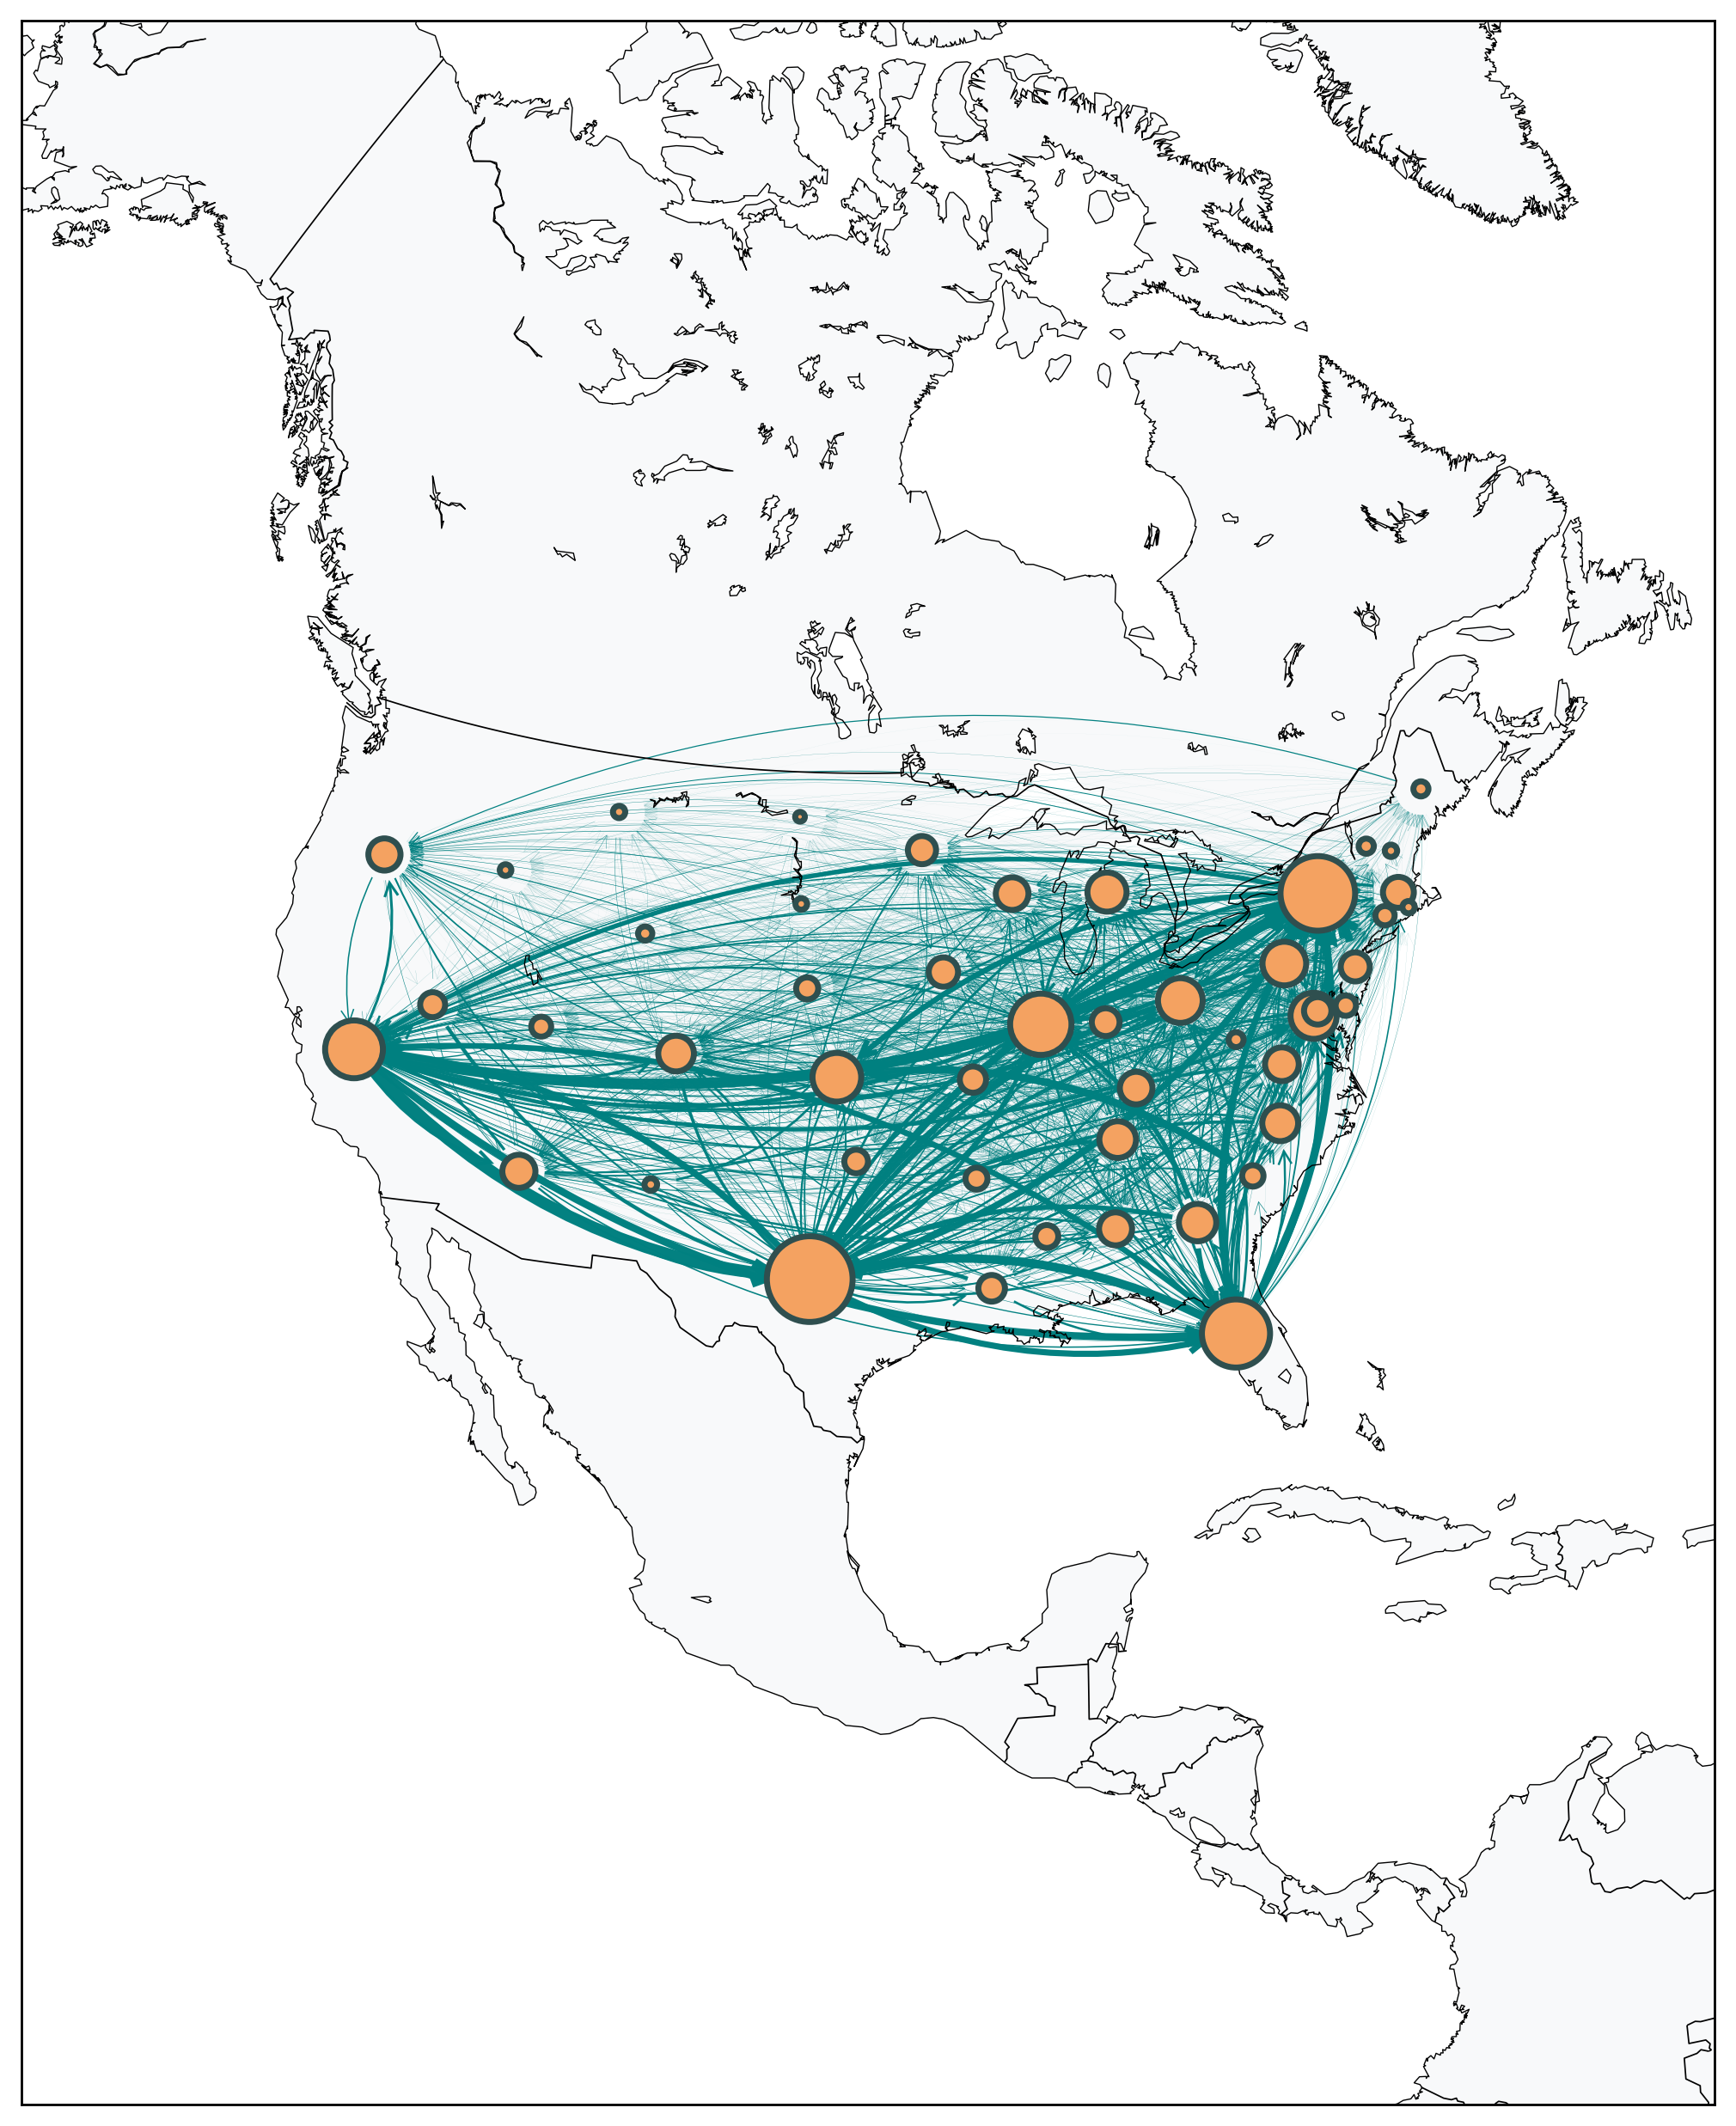

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import networkx as nx
import numpy as np
import pandas as pd

# === SETUP ===
plt.figure(figsize=(10, 10), dpi=250)

m = Basemap(width=6500000,height=8000000,
            resolution='l',projection='laea',\
            lat_0=39,lon_0=-97.)

lat_lon_df = pd.read_csv(parent_dir / 'Data' / 'US' / 'lat_lon_US no wa.csv')
mx, my = m(lat_lon_df['lon'].values, lat_lon_df['lat'].values)
pos = {elem: (mx[count], my[count]) for count, elem in enumerate(lat_lon_df['ISO 2'])}

m.fillcontinents(color='#f8f9fa')
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.4)

# === Compute edge widths ===
weights = []
edges = []
for u, v in DG.edges():
    weight = DG[u][v]['weight'] / 200
    weights.append(weight * 6)  # thicker lines
    edges.append((u, v))

# === DRAW CURVED EDGES WITH SHARP ARROWHEADS ===
arrows = nx.draw_networkx_edges(
    DG,
    pos=pos,
    edgelist=edges,
    arrows=True,
    arrowstyle='->',                   # sharper arrowhead
    edge_color='teal',
    alpha=0.99,
    width=weights,
    connectionstyle='arc3,rad=0.2'      # <--- this keeps the edges curved!
)

# === Make arrowheads sharp ===
for a, w in zip(arrows, weights):
    a.set_mutation_scale(10 + w * 1.5)  # head size smaller than tail
    a.set_joinstyle('miter')            # sharp head corners
    a.set_capstyle('butt')              # clean tail ending

nx.draw_networkx_nodes(G = DG, pos = pos, node_color = '#f4a261', alpha = 1, node_size = degree_df['indegree']/1.5, edgecolors='darkslategray', linewidths = 2.0)

plt.tight_layout()
plt.savefig(parent_dir / 'Data analysis' / 'Network measures' / 'in_strength_US_arrows.png', dpi=250)
plt.show()
